In [24]:
import os

print(os.getcwd())
import json
import pandas as pd
import matplotlib.pyplot as plt

/home/leonardo/PycharmProjects/ALMONDO-Model/src/almondo_model/viz


In [25]:
#nl = 2 # number of lobbyists
#b = 30 # [30, 60, 150, 300, 500, 750, 1000]  # lobbyists budget in the simulation
paths = ['/home/leonardo/PycharmProjects/ALMONDO-Model/results/balanced_budgets/2_lobbyists_frontload_frontload',
             '/home/leonardo/PycharmProjects/ALMONDO-Model/results/balanced_budgets/2_lobbyists_frontload_random',
             '/home/leonardo/PycharmProjects/ALMONDO-Model/results/balanced_budgets/2_lobbyists_backload_random']

for path in paths:

    basepath = '/home/leonardo/PycharmProjects/ALMONDO-Model/results/balanced_budgets/2_lobbyists'
    filename = 'config.json'
    abs_path = os.path.abspath(os.path.join(basepath, filename))
    print(abs_path)
    with open(abs_path, 'r') as f:
        params = json.load(f)


/home/leonardo/PycharmProjects/ALMONDO-Model/results/balanced_budgets/2_lobbyists/config.json


In [26]:
    print(params)

{'p_o': 0.01, 'p_p': 0.99, 'lambda_values': [0.0, 0.5, 1.0], 'phi_values': [0.0, 0.5, 1.0], 'T': 100, 'n_lobbyists': 2, 'lobbyists_data': {'0': {'m': 0, 'B': 10000, 'c': 1, 'T': 100, 'strategy_type': 'frontloading', 'strategies': []}, '1': {'m': 1, 'B': 10000, 'c': 1, 'T': 100, 'strategy_type': 'random', 'strategies': []}}, 'nruns': 100}


In [11]:
    p_o = params['p_o']
    p_p = params['p_p']
    lambda_values = params['lambda_values']
    phi_values = params['phi_values']
    n_lobbyists = params['n_lobbyists']
    nruns = params['nruns']
    lobbyists_data = params['lobbyists_data']

In [27]:
    kinds = ['weights', 'probabilities']

    data = []

    for folder in os.listdir(basepath):
        paramspath = os.path.join(basepath, folder)
        try:
            lambda_v = float(folder.split('_')[0])
            phi_v = float(folder.split('_')[1])
        #if lambda_v ==0.05 or lambda_v == 0.95 or phi_v == 0.05 or phi_v ==0.95:
        #  continue
        except:
            continue
    
        for kind in kinds:
            if os.path.exists(paramspath+f'/{kind}_average_metrics.json'):
                filename = os.path.join(paramspath, f'{kind}_average_metrics.json')
                with open(filename, 'r') as f:
                    avg_metrics = json.load(f)
                            
                columns = ['kind', 'n_lobbyists', 'lambda', 'phi', 'nruns', 'p_o', 'p_p']
                values = [kind, n_lobbyists, lambda_v, phi_v, nruns, p_o, p_p]
            
                for metric_name in avg_metrics.keys():
                    if metric_name == 'average_opinions':
                        avg = avg_metrics[metric_name]['avg']
                        std = avg_metrics[metric_name]['std']
                        t_stat = avg_metrics[metric_name]['t_statistic']
                        p_val = avg_metrics[metric_name]['p_value']
                        columns.extend([f'avg_{metric_name}', f'std_{metric_name}', f't_stat_{metric_name}', f'p_val_{metric_name}'])
                        values.extend([avg, std, t_stat, p_val])
                    elif metric_name != 'lobbyists_performance':
                        avg = avg_metrics[metric_name]['avg']
                        std = avg_metrics[metric_name]['std']
                        columns.extend([f'avg_{metric_name}', f'std_{metric_name}'])
                        values.extend([avg, std])
                    else:
                        for id in lobbyists_data.keys():
                            if lobbyists_data[id]['m'] == 0:
                                print('entering here')
                                avg = avg_metrics[metric_name][id]['avg']
                                std = avg_metrics[metric_name][id]['std']
                                columns.extend([f'avg_{metric_name}_pess_{id}', f'std_{metric_name}_pess_{id}'])
                                values.extend([avg, std])
                                break
                        for id in lobbyists_data.keys():
                            if lobbyists_data[id]['m'] == 1:
                                print('entering here')
                                avg = avg_metrics[metric_name][id]['avg']
                                std = avg_metrics[metric_name][id]['std']
                                columns.extend([f'avg_{metric_name}_opt_{id}', f'std_{metric_name}_opt_{id}'])
                                values.extend([avg, std])
                                break
                                    
                row = dict(zip(columns, values))
                
                data.append(row)

    df = pd.DataFrame(data)
    print(df.columns)
    datapath = os.path.join(basepath, 'aggregate_metrics.csv')
    df.to_csv(datapath)

entering here
entering here
entering here
entering here
entering here
entering here
entering here
entering here
entering here
entering here
entering here
entering here
entering here
entering here
entering here
entering here
entering here
entering here
Index(['kind', 'n_lobbyists', 'lambda', 'phi', 'nruns', 'p_o', 'p_p',
       'avg_effective_number_clusters', 'std_effective_number_clusters',
       'avg_number_iterations', 'std_number_iterations',
       'avg_average_pairwise_distance', 'std_average_pairwise_distance',
       'avg_average_opinions', 'std_average_opinions',
       't_stat_average_opinions', 'p_val_average_opinions', 'avg_std_opinions',
       'std_std_opinions', 'avg_lobbyists_performance_pess_0',
       'std_lobbyists_performance_pess_0', 'avg_lobbyists_performance_opt_1',
       'std_lobbyists_performance_opt_1'],
      dtype='object')


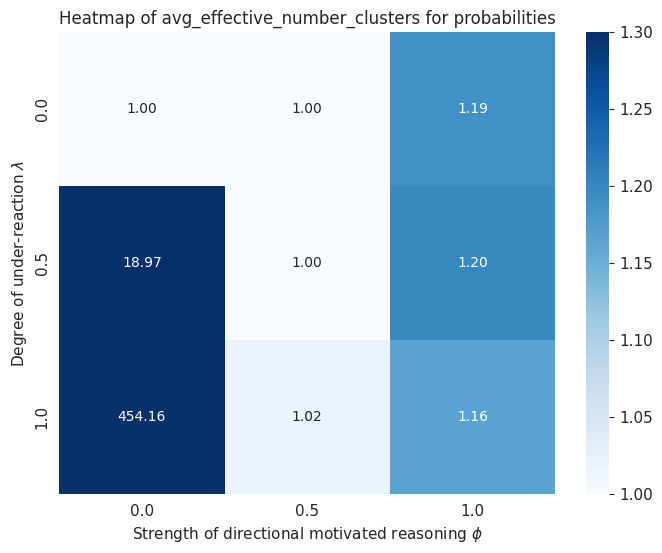

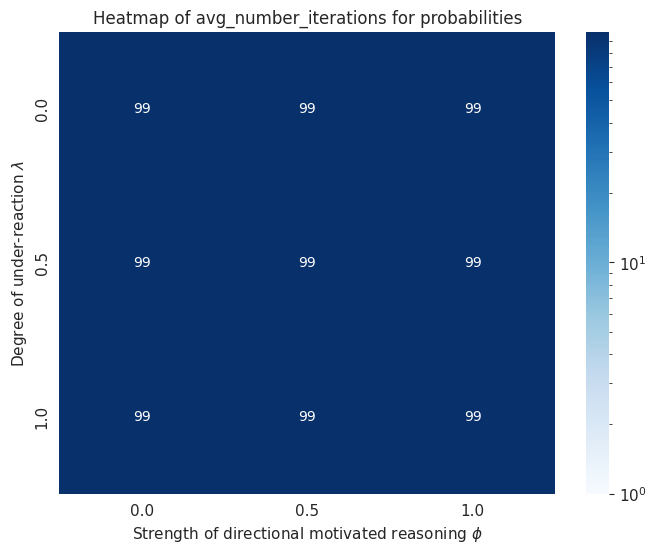

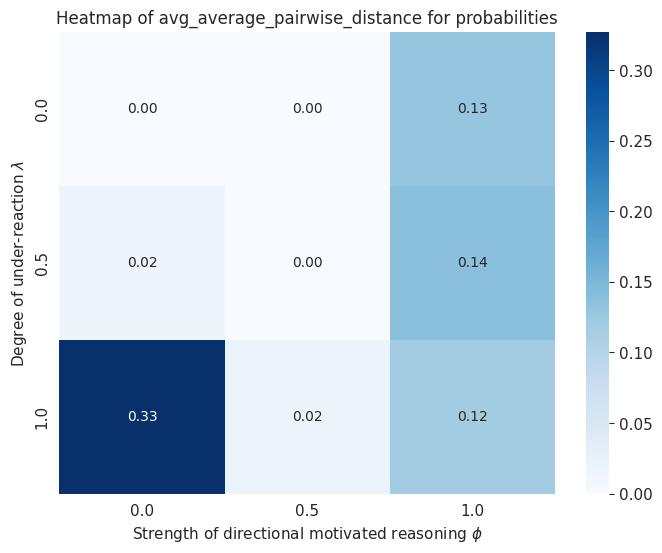

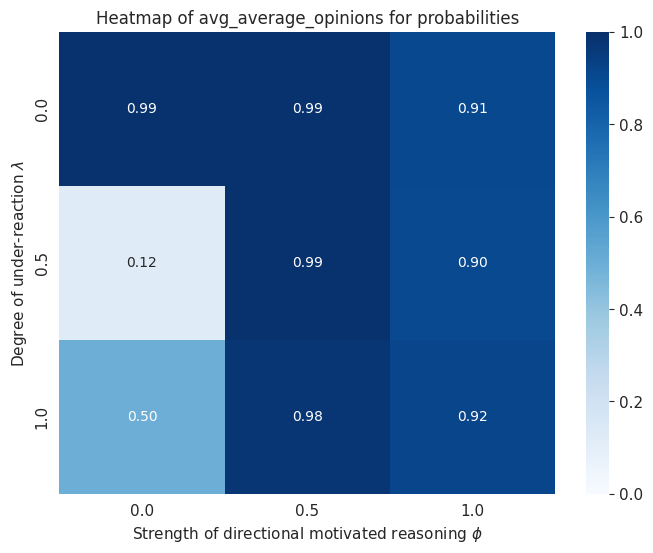

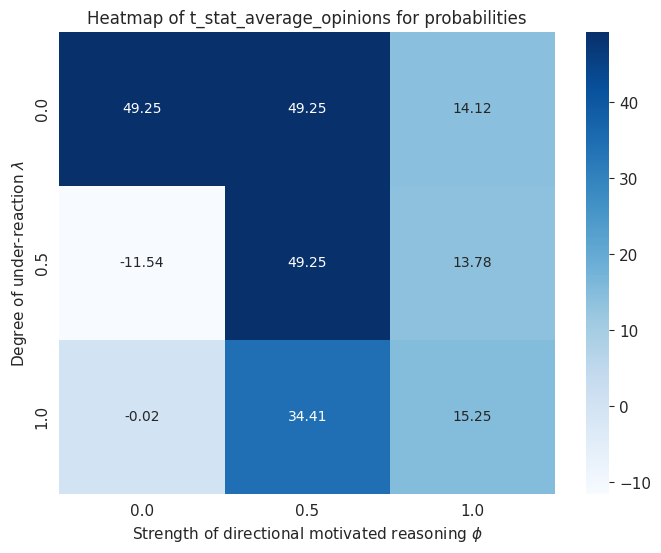

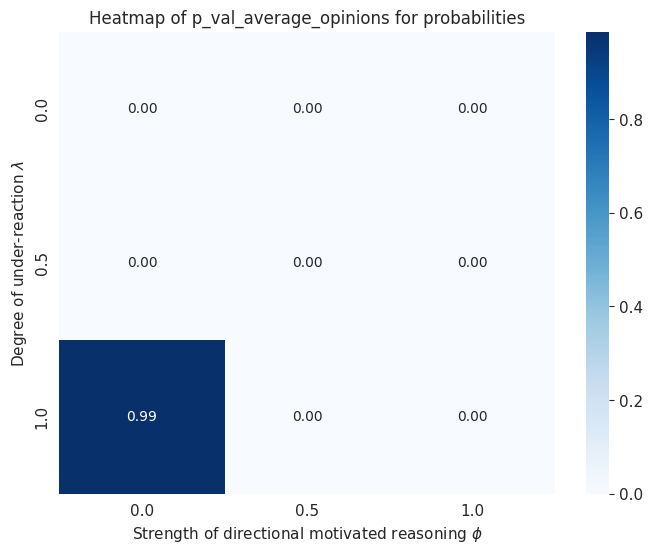

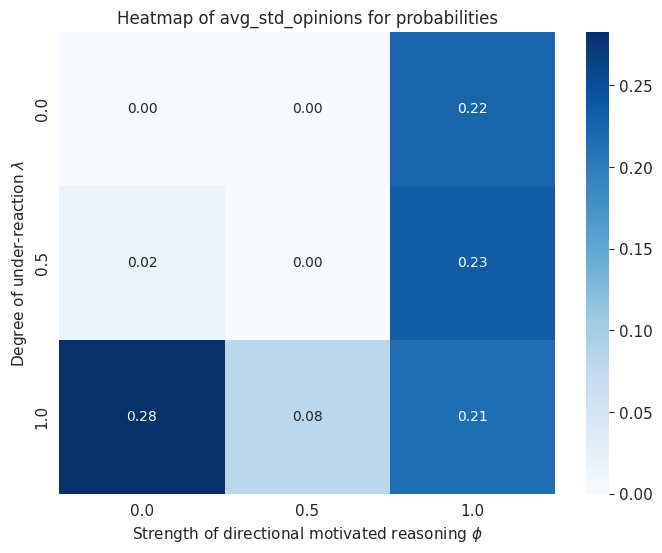

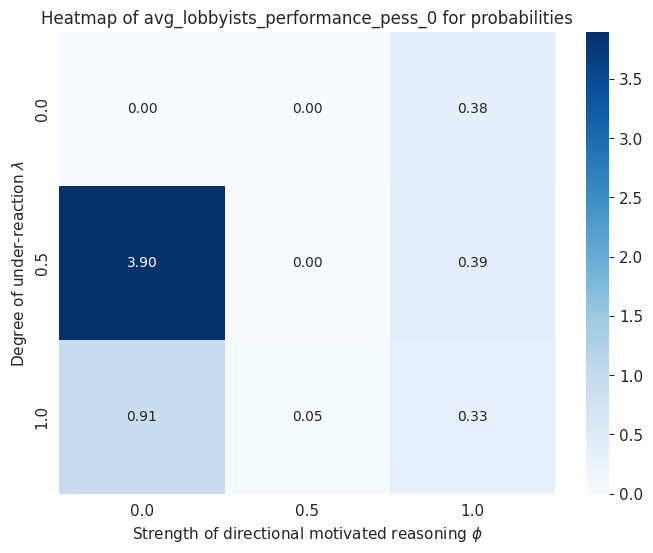

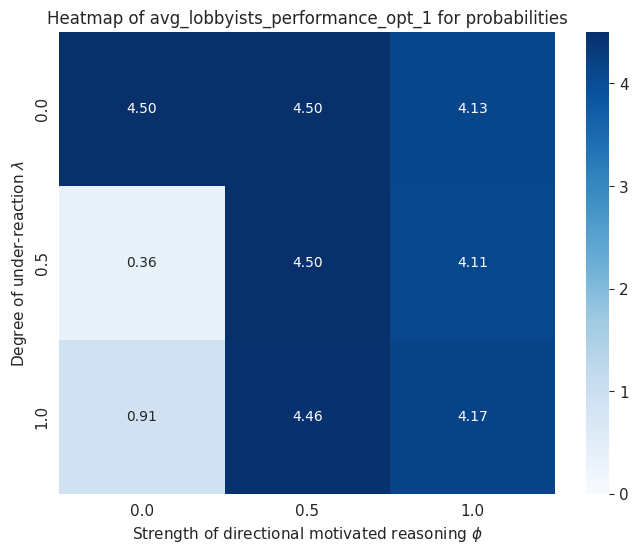

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

    from matplotlib.colors import LogNorm

    def heatmap(kind, metric, log_scale=False, figname=None):
        # Filter the DataFrame

        df_filtered = df[df["kind"] == kind]

        # Pivot the table to have phi and lambda as axes
        heatmap_data = df_filtered.pivot(index="lambda", columns="phi", values=metric)

        # Plot the heatmap
        plt.figure(figsize=(8, 6))
        if metric == 'avg_average_opinions':
            ax = sns.heatmap(heatmap_data, vmin=0, vmax=1, cmap="Blues", annot=True, fmt=".2f")
        elif metric == 'avg_number_iterations':
            if log_scale:
                ax = sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".0f", norm=LogNorm(vmin = 1))
            else:
                ax = sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".0f")
        elif metric.startswith('avg_lobbyists_performance') or metric == 'avg_average_pairwise_distance' or metric == 'avg_std_opinions':
            ax = sns.heatmap(heatmap_data, vmin = 0, cmap="Blues", annot=True, fmt=".2f")
        elif metric == 'avg_effective_number_clusters':
            ax = sns.heatmap(heatmap_data, vmin = 1,vmax = 1.3, cmap="Blues", annot=True, fmt=".2f")
        else:
            ax = sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".2f")
        plt.title(f"Heatmap of {metric} for {kind}")
        plt.xlabel(r"Strength of directional motivated reasoning $\phi$", fontsize = 11)
        plt.ylabel(r"Degree of under-reaction $\lambda$", fontsize = 11)
        ## change fontsize of heatmap ticks
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=11)
        ## change font size of colobar label
        cbar = ax.collections[0].colorbar
        cbar.ax.tick_params(labelsize=11)
        figpath = os.path.join(basepath, 'figures')
        os.makedirs(figpath, exist_ok=True)

        if figname is not None:
            figname = os.path.join(figpath, figname)
            plt.savefig(figname, dpi=300, bbox_inches='tight', facecolor='white')
        else:
            plt.show()

        plt.close()

    for kind in ['probabilities', 'weights']:
        if kind in df['kind'].unique() :
            for col in columns:
                if col.startswith('avg') or col.startswith('t_stat') or col.startswith('p_val') :
                    metric = col
                    figname = f'heatmap_{kind}_{metric}.png'
                    heatmap(kind, metric, log_scale=True, figname=figname)
                    heatmap(kind, metric, log_scale=True, figname=None)

In [29]:
    kinds = ['weights', 'probabilities']

    data = []

    for folder in os.listdir(basepath):
        paramspath = os.path.join(basepath, folder)
        try:
            lambda_v = float(folder.split('_')[0])
            phi_v = float(folder.split('_')[1])
        except:
            continue

        for kind in kinds:
            if os.path.exists(paramspath+f'/{kind}_average_metrics.json'):
                filename = os.path.join(paramspath, f'{kind}_metrics_distributions.json')
                with open(filename, 'r') as f:
                    metrics = json.load(f)

                columns = ['kind', 'lambda', 'phi']
                values = [kind, lambda_v, phi_v]

                for metric_name in metrics.keys():
                    if metric_name != 'lobbyists_performance':
                        columns.append(metric_name)
                        values.append(metrics[metric_name])
                    else:
                        for id in lobbyists_data.keys():
                            if lobbyists_data[id]['m'] == 0:
                                columns.append(f'{metric_name}_pess_{id}')
                                values.append(metrics[metric_name][id])
                                break
                        for id in lobbyists_data.keys():
                            if lobbyists_data[id]['m'] == 1:
                                columns.append(f'{metric_name}_opt_{id}')
                                values.append(metrics[metric_name][id])
                                break
                        #for id in lobbyists_data.keys():
                        #   columns.append(f'{metric_name}_{id}')
                        #   values.append(metrics[metric_name][id])

                row = dict(zip(columns, values))

                data.append(row)

    df = pd.DataFrame(data)
    datapath = os.path.join(basepath, 'metrics_distributions.csv')
    df.to_csv(datapath)

In [ ]:
df

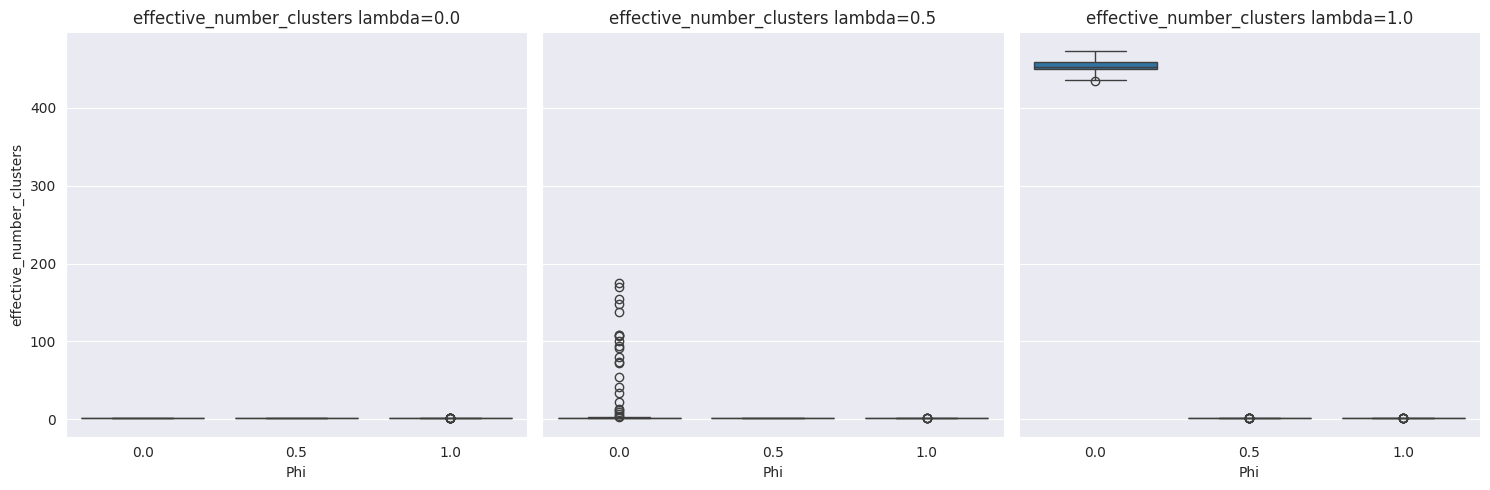

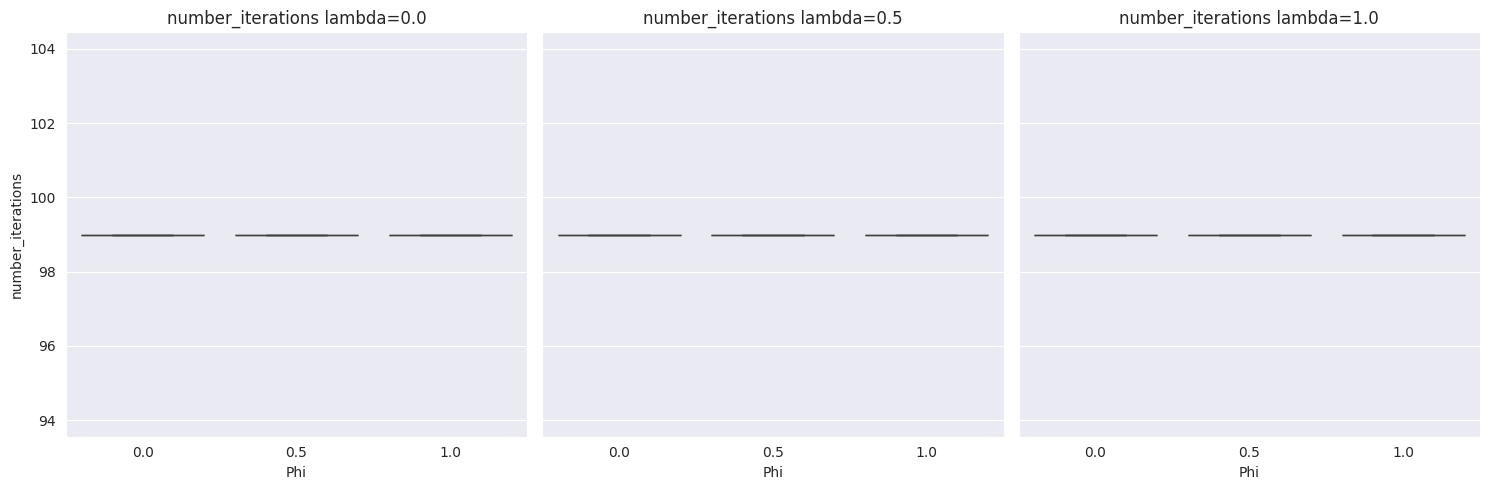

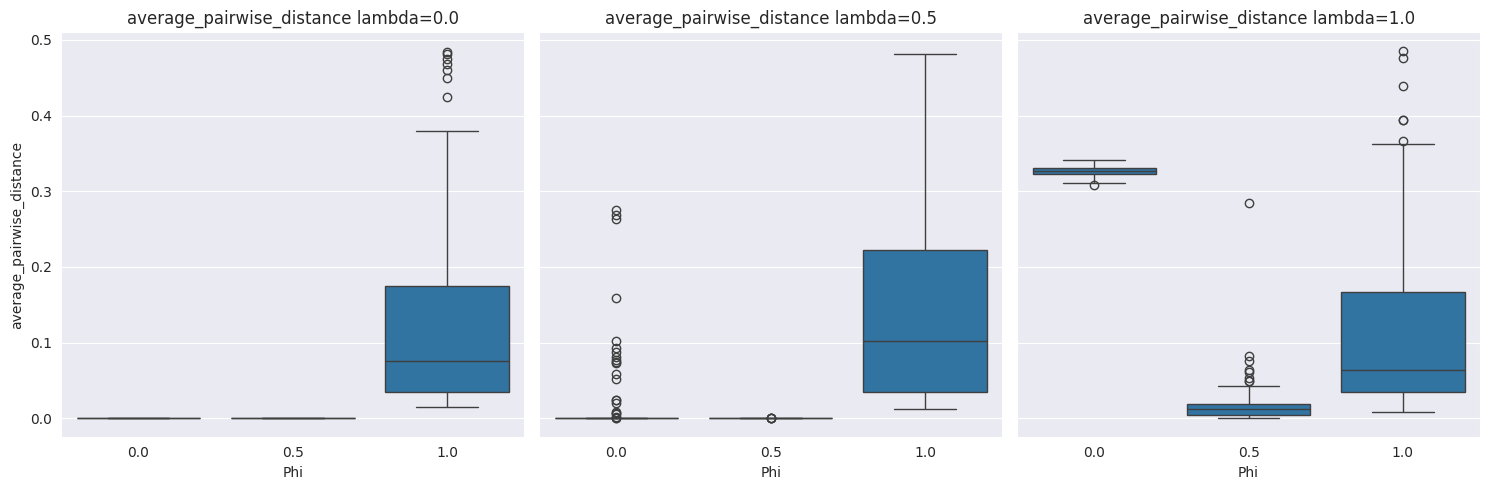

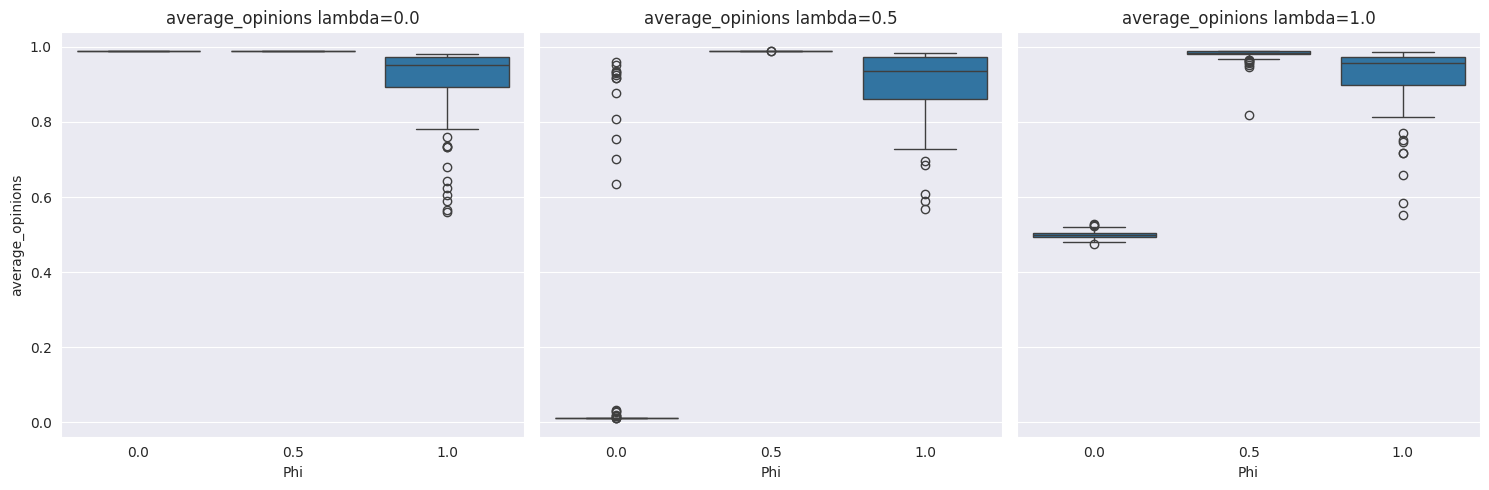

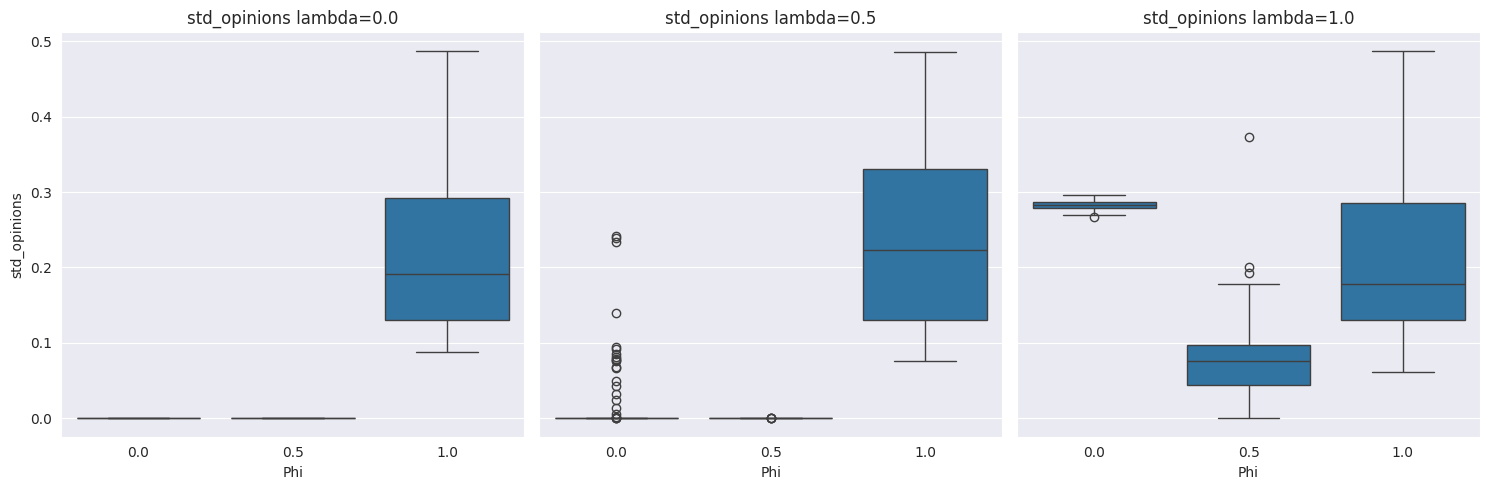

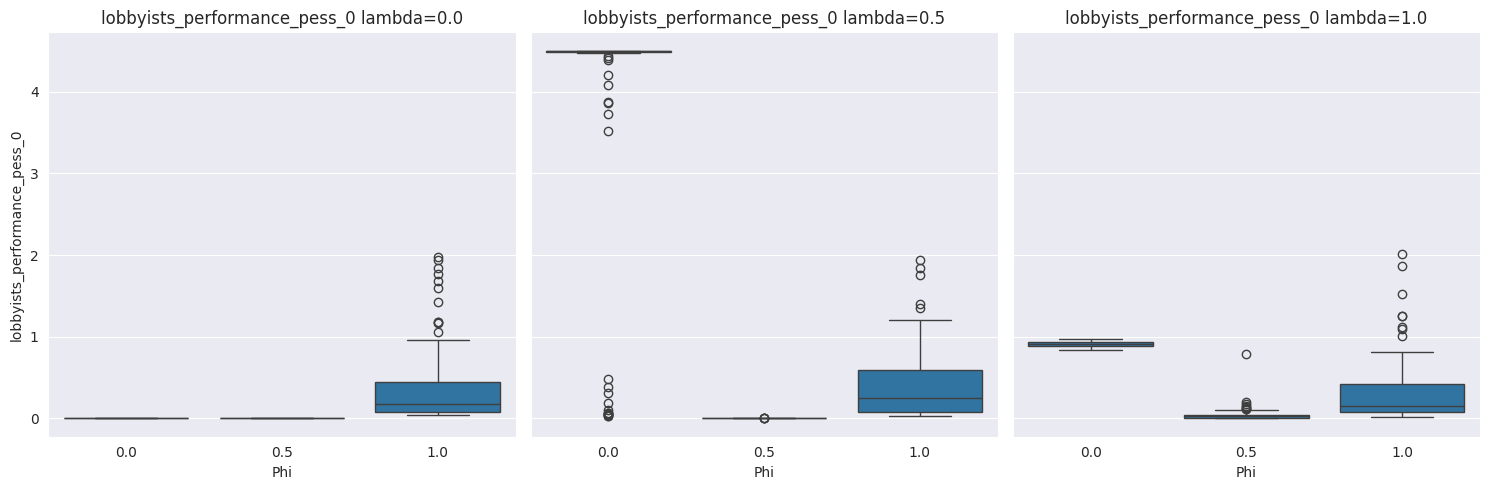

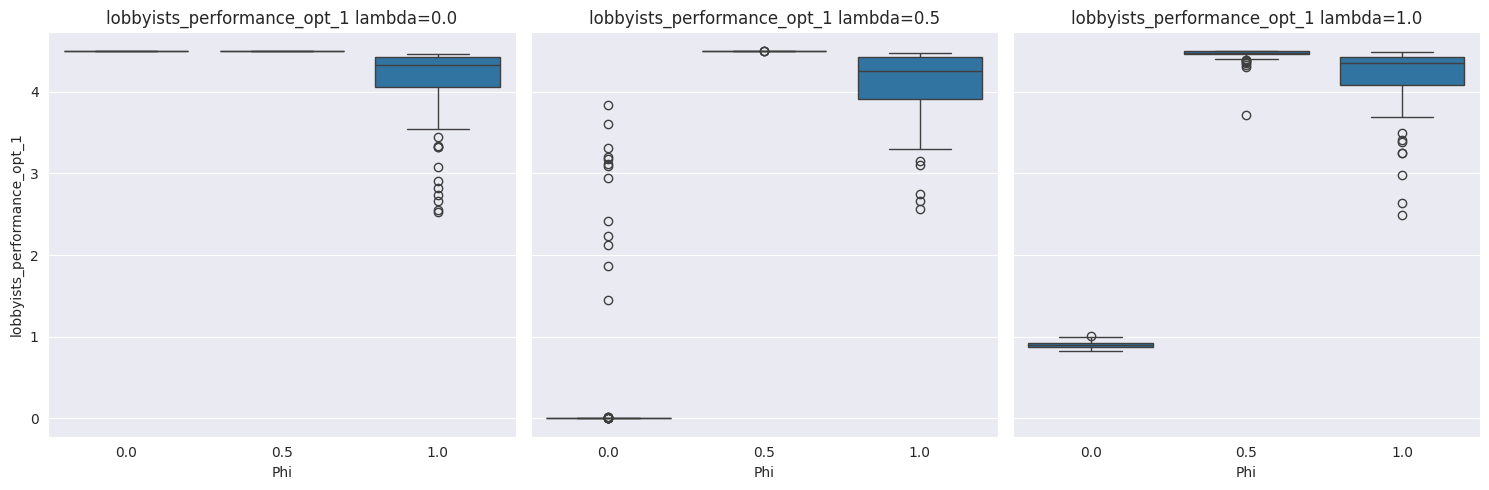

In [30]:
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

    def explode_lists(df):
        """Expands list values into separate rows while keeping other columns unchanged."""
        id_vars = ["kind", "lambda", "phi"]
        value_vars = [col for col in df.columns if col not in id_vars]

        exploded_data = []
        for _, row in df.iterrows():
            max_len = max(len(row[col]) for col in value_vars)
            for i in range(max_len):
                exploded_row = {col: row[col] if col in id_vars else row[col][i] for col in df.columns}
                exploded_data.append(exploded_row)

        return pd.DataFrame(exploded_data)

    def plot_metrics_grid(df):
        df = explode_lists(df)
        metrics = [col for col in df.columns if col not in ["kind", "lambda", "phi"]]
        lambda_values = sorted(df["lambda"].unique())
        num_lambdas = len(lambda_values)

        kind = 'probabilities'
        df_kind = df[df["kind"] == kind]
        for metric in metrics:
            fig, axes = plt.subplots(1, num_lambdas, figsize=(5 * num_lambdas, 5), sharey=True)

            if num_lambdas == 1:
                axes = [axes]  # Ensure axes is iterable if only one lambda value exists

            for i, lambd in enumerate(lambda_values):
                ax = axes[i]
                subset = df_kind[df_kind["lambda"] == lambd]

                sns.boxplot(x="phi", y=metric, data=subset, ax=ax)
                ax.set_title(f"{metric} lambda={lambd}")
                ax.set_xlabel("Phi")
                ax.set_ylabel(metric)

            plt.tight_layout()
            figpath = os.path.join(basepath, 'figures')
            os.makedirs(figpath, exist_ok=True)
            figname = os.path.join(figpath, f'boxplots_{metric}.png')
            plt.savefig(figname, dpi=300, bbox_inches='tight', facecolor='white')
            plt.show()
            plt.close()

    # Example usage
    #df = pd.read_csv(datapath)  # Load the DataFrame from CSV or other sources
    plot_metrics_grid(df)
